# <b> Eager Execution vs Graph Execution: Which is better?

Comparing Eager Execution and Graph Execution by understanding when to use each.

# <b>Eager Execution</b>
Since the eager execution is intuitive and easy to test, it is an excellent option for beginners. Eager execution provides:
+ An intuitive interface with natural Python code and data structures;
+ Easier debugging with calling operations directly to inspect and test models;
+ Natural control flow with Python, instead of graph control flow; and
+ Support for GPU & TPU acceleration.

# <b> Graph Execution

Eager execution is slower than graph execution! Graph Execution is:
+ Very Fast;
+ Very Flexible;
+ Runs in parallel, even in sub-operation level; and
+ Very efficient, on multiple devices
+ with GPU & TPU acceleration capability.


# <b> Why TensorFlow adopted Eager Execution?


Before version 2.0, TensorFlow prioritized graph execution because it was fast, efficient, and flexible while PyTorch adopted a different approach and prioritized dynamic computation graphs, which is a similar concept to eager execution. This made PyTorch more attractive to newcomers and started to catch up to TensorFlow.

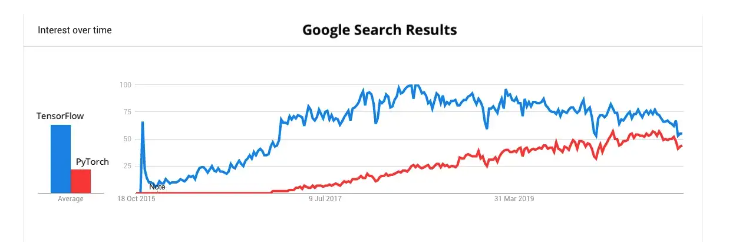

# <b> Code snippets with Eager & Graph Executions

In [21]:
import tensorflow as tf # Our main TensorFlow import
import timeit # Timeit module provides a simple way to time small bits of Python code.
import warnings
import os
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [22]:
def eager_function(x):
  result = x ** 2
  print(result)
  return result

x = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0])

eager_function(x)

tf.Tensor([ 1.  4.  9. 16. 25.], shape=(5,), dtype=float32)


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([ 1.,  4.,  9., 16., 25.], dtype=float32)>

In [23]:
def eager_function(x):
  result = x ** 2
  print(result)
  return result

x = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0])
graph_function = tf.function(eager_function)
graph_function(x)

Tensor("pow:0", shape=(5,), dtype=float32)


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([ 1.,  4.,  9., 16., 25.], dtype=float32)>

In [24]:

print("Eager time:", timeit.timeit(lambda: eager_function(x), number=1))
print("Graph time:", timeit.timeit(lambda: graph_function(x), number=1))

tf.Tensor([ 1.  4.  9. 16. 25.], shape=(5,), dtype=float32)
Eager time: 0.000814112998341443
Graph time: 0.0004348920010670554


In [25]:
print("Eager time:", timeit.timeit(lambda: eager_function(x), number=100))
print("Graph time:", timeit.timeit(lambda: graph_function(x), number=100))

tf.Tensor([ 1.  4.  9. 16. 25.], shape=(5,), dtype=float32)
tf.Tensor([ 1.  4.  9. 16. 25.], shape=(5,), dtype=float32)
tf.Tensor([ 1.  4.  9. 16. 25.], shape=(5,), dtype=float32)
tf.Tensor([ 1.  4.  9. 16. 25.], shape=(5,), dtype=float32)
tf.Tensor([ 1.  4.  9. 16. 25.], shape=(5,), dtype=float32)
tf.Tensor([ 1.  4.  9. 16. 25.], shape=(5,), dtype=float32)
tf.Tensor([ 1.  4.  9. 16. 25.], shape=(5,), dtype=float32)
tf.Tensor([ 1.  4.  9. 16. 25.], shape=(5,), dtype=float32)
tf.Tensor([ 1.  4.  9. 16. 25.], shape=(5,), dtype=float32)
tf.Tensor([ 1.  4.  9. 16. 25.], shape=(5,), dtype=float32)
tf.Tensor([ 1.  4.  9. 16. 25.], shape=(5,), dtype=float32)
tf.Tensor([ 1.  4.  9. 16. 25.], shape=(5,), dtype=float32)
tf.Tensor([ 1.  4.  9. 16. 25.], shape=(5,), dtype=float32)
tf.Tensor([ 1.  4.  9. 16. 25.], shape=(5,), dtype=float32)
tf.Tensor([ 1.  4.  9. 16. 25.], shape=(5,), dtype=float32)
tf.Tensor([ 1.  4.  9. 16. 25.], shape=(5,), dtype=float32)
tf.Tensor([ 1.  4.  9. 16. 25.], shape=(

# <b> Full Model Test


In [26]:
# TensorFlow imports
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Flatten, Dense


In [27]:
# Model building
inputs = Input(shape=(28, 28)) 
x = Flatten()(inputs) 
x = Dense(256, "relu")(x)
x = Dense(256, "relu")(x) 
x = Dense(256, "relu")(x) 
outputs = Dense(10, "softmax")(x) 

input_data = tf.random.uniform([100, 28, 28])



In [28]:
# Eager Execution
eager_model = Model(inputs=inputs, outputs=outputs)
print("Eager time:", timeit.timeit(lambda: eager_model(input_data), number=10000))

#Graph Execution 
graph_model = tf.function(eager_model) # Wrap the model with tf.function 
print("Graph time:", timeit.timeit(lambda: graph_model(input_data), number=10000))

Eager time: 24.331757528998423
Graph time: 8.798270911000145
